The goal here is to break up a 2D image of stentor's mac into a stack of cylinders, then add up the volumes of these cylinders to calculate the volume of the whole mac.

Steps taken:
1. load image as numpy array
2. count the number of pixels in each column that belong to the mac
3. add up the number of mac pixels to get the cylinder's diameter in pixels
4. convert diameter to um
5. calculate volume of cylinders - radius from measurements, height is 1 px (in um)
6. add up the volumes of all the cylinders

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
#write pixel to micron conversion factor here! 
#um = n um/px
um = 0.27

In [3]:
#import image as numpy array using matplotlib
img = mpimg.imread('220406_MacCycle_13_36_py.png')

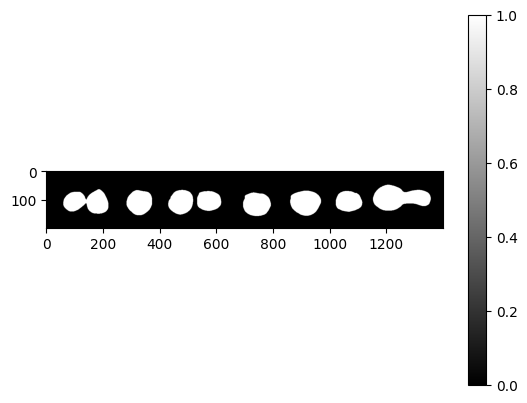

In [4]:
#Displaying image as grayscale
imgplot = plt.imshow(img, cmap="gray")
plt.colorbar()

In [5]:
#image is now a matrix where true = pixel intensity > 0 (white area on image)
#false is pixel intensity is 0 (black background)
print(img > 0)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [6]:
#counting the number of true (white) pixels in each column
diam_px = np.count_nonzero(img > 0, axis=0)

Calculating the volume in um^3. First I need to convert the diameters to um

In [7]:
#convert diam_px to diam_um by multiplying all values by the variable um defined at beginning
diam_um = um * diam_px

In [8]:
#calc radius of slices in um
rad_um = diam_um / 2

In [9]:
#calc volume of slices 
#1 px wide cylinders = 0.73 um wide cylinder
#radius given by rad_um matrix
vol_slices_um = np.pi * ((rad_um)**2) * um

In [10]:
#add up all the slice volumes to get mac volume in um^3
np.sum(vol_slices_um)

61345.114285031486